In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data

 ADANIENT_historical_candle_data.csv	 ITC_historical_candle_data.csv
 ADANIPORTS_historical_candle_data.csv	 JIOFIN_historical_candle_data.csv
 APOLLOHOSP_historical_candle_data.csv	 JSWSTEEL_historical_candle_data.csv
 ASIANPAINT_historical_candle_data.csv	 KOTAKBANK_historical_candle_data.csv
 AXISBANK_historical_candle_data.csv	 LT_historical_candle_data.csv
 BAJAJ-AUTO_historical_candle_data.csv	 MARUTI_historical_candle_data.csv
 BAJAJFINSV_historical_candle_data.csv	'M&M_historical_candle_data.csv'
 BAJFINANCE_historical_candle_data.csv	 NESTLEIND_historical_candle_data.csv
 BEL_historical_candle_data.csv		 NTPC_historical_candle_data.csv
 BHARTIARTL_historical_candle_data.csv	 ONGC_historical_candle_data.csv
 CIPLA_historical_candle_data.csv	 POWERGRID_historical_candle_data.csv
 COALINDIA_historical_candle_data.csv	 RELIANCE_historical_candle_data.csv
 DRREDDY_historical_candle_data.csv	 SBILIFE_historical_candle_data.csv
 EICHERMOT_historical_candle_data.csv	 SHRIRAMFIN_histor

In [ ]:
import pandas as pd

import os


In [ ]:
os.makedirs("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV", exist_ok=True)

In [ ]:
for i in os.listdir("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/"):
  print(i)

ADANIENT_historical_candle_data.csv
ADANIPORTS_historical_candle_data.csv
APOLLOHOSP_historical_candle_data.csv
ASIANPAINT_historical_candle_data.csv
AXISBANK_historical_candle_data.csv
BAJAJ-AUTO_historical_candle_data.csv
BAJAJFINSV_historical_candle_data.csv
BAJFINANCE_historical_candle_data.csv
BEL_historical_candle_data.csv
BHARTIARTL_historical_candle_data.csv
CIPLA_historical_candle_data.csv
COALINDIA_historical_candle_data.csv
DRREDDY_historical_candle_data.csv
EICHERMOT_historical_candle_data.csv
ETERNAL_historical_candle_data.csv
GRASIM_historical_candle_data.csv
HCLTECH_historical_candle_data.csv
HDFCBANK_historical_candle_data.csv
HDFCLIFE_historical_candle_data.csv
HEROMOTOCO_historical_candle_data.csv
HINDALCO_historical_candle_data.csv
HINDUNILVR_historical_candle_data.csv
ICICIBANK_historical_candle_data.csv
INDUSINDBK_historical_candle_data.csv
INFY_historical_candle_data.csv
ITC_historical_candle_data.csv
JIOFIN_historical_candle_data.csv
JSWSTEEL_historical_candle_da

In [ ]:
for i in os.listdir("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/"):
  df = pd.read_csv(f"drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/{i}")

  # Make sure your timestamp column is in datetime format
  df['timestamp'] = pd.to_datetime(df['timestamp'])

  # Set datetime as index (needed for resampling)
  df = df.set_index('timestamp')

  # Resample to Daily OHLCV
  # open = first value, high = max, low = min, close = last value, volume = sum
  df_daily = df.resample('1D').agg({
      'open': 'first',
      'high': 'max',
      'low': 'min',
      'close': 'last',
      'volume': 'sum'
  })

  # Drop days where no trading happened (NaNs)
  df_daily = df_daily.dropna()

  # Save as CSV
  output_path = f"drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV/{i}"
  df_daily.to_csv(output_path)

  print(f"✅ Daily OHLCV saved to: {output_path}")

✅ Daily OHLCV saved to: drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV/ADANIENT_historical_candle_data.csv
✅ Daily OHLCV saved to: drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV/ADANIPORTS_historical_candle_data.csv
✅ Daily OHLCV saved to: drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV/APOLLOHOSP_historical_candle_data.csv
✅ Daily OHLCV saved to: drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV/ASIANPAINT_historical_candle_data.csv
✅ Daily OHLCV saved to: drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV/AXISBANK_historical_candle_data.csv
✅ Daily OHLCV saved to: drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV/BAJAJ-AUTO_historical_candle_data.csv
✅ Daily OHLCV saved to: drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV/BAJAJFINSV_historical_candle_data.csv
✅ Daily OHLCV saved to: drive/M

In [ ]:
import pandas as pd
import os

# Directory with all stock CSVs
data_dir = "drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Daily_OHLCV"

# Collect adjusted close (or close) prices of all stocks
all_data = {}

for file in os.listdir(data_dir):

    if file.endswith(".csv"):
        stock_name = file.split("_")[0]
        df = pd.read_csv(os.path.join(data_dir, file), parse_dates=['timestamp'])
        # Ensure datetime sorted
        df = df.sort_values('timestamp')
        if df.shape[0] != 895:
          continue
        # Take 'close' prices (change to 'adj_close' if available)
        # all_data[stock_name] = df['close'].values
        all_data[stock_name] = df.set_index('timestamp')['close']

# Convert to DataFrame
# Align all stocks by row index (assuming same dates in each file)
df_all = pd.DataFrame(all_data)

# Compute daily returns
returns = df_all.pct_change().dropna()

# Correlation matrix
corr_matrix = returns.corr()

print("✅ Correlation matrix saved!")
print(corr_matrix)


✅ Correlation matrix saved!
            ADANIENT  ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  \
ADANIENT    1.000000    0.774539    0.178962    0.235754  0.238394   
ADANIPORTS  0.774539    1.000000    0.221979    0.271639  0.345134   
APOLLOHOSP  0.178962    0.221979    1.000000    0.247105  0.227453   
ASIANPAINT  0.235754    0.271639    0.247105    1.000000  0.191886   
AXISBANK    0.238394    0.345134    0.227453    0.191886  1.000000   
BAJAJ-AUTO  0.196046    0.225162    0.243855    0.225977  0.251213   
BAJAJFINSV  0.311335    0.369608    0.273170    0.334156  0.420947   
BAJFINANCE  0.296621    0.365284    0.292321    0.343456  0.383196   
BEL         0.362020    0.479418    0.248935    0.178101  0.299908   
BHARTIARTL  0.227646    0.301059    0.237051    0.195983  0.296991   
CIPLA       0.098884    0.145792    0.221672    0.138342  0.137342   
COALINDIA   0.306248    0.393745    0.240997    0.091727  0.300222   
DRREDDY     0.154682    0.176032    0.231541    0.155672  0.15

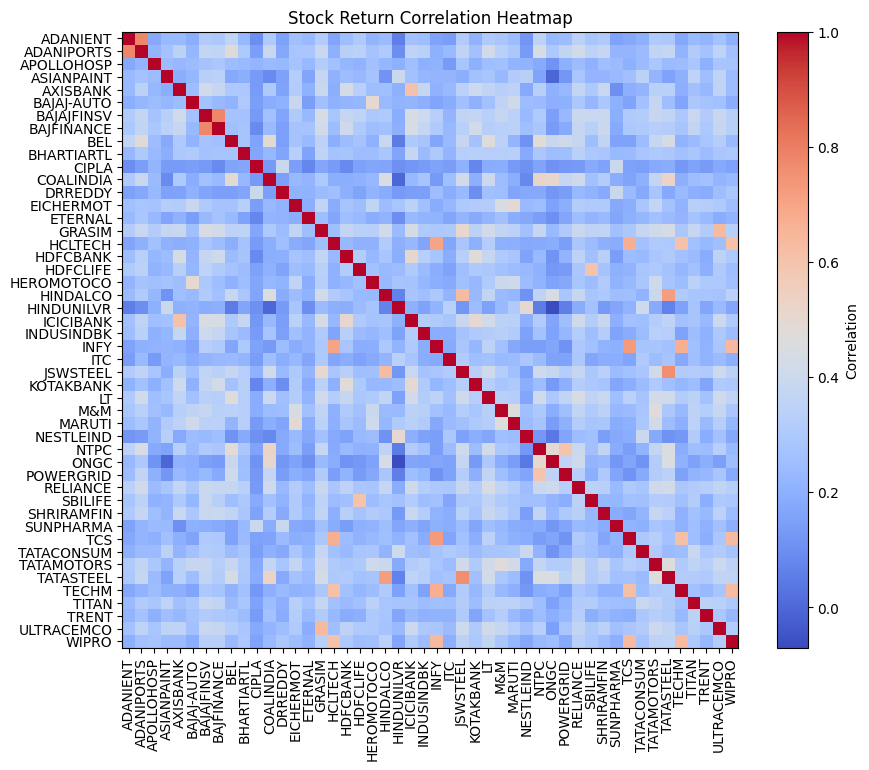

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title("Stock Return Correlation Heatmap")
plt.show()

In [ ]:
corr_pairs = corr_matrix.unstack()

# Drop self-correlations (always 1.0)
corr_pairs = corr_pairs[corr_pairs < 0.999]

# Sort by correlation value
corr_pairs = corr_pairs.sort_values(ascending=False)

# Keep only one of each pair (A-B same as B-A)
corr_pairs = corr_pairs.reset_index()
corr_pairs.columns = ["Stock1", "Stock2", "Correlation"]
corr_pairs = corr_pairs[corr_pairs["Stock1"] < corr_pairs["Stock2"]]

# Filter by threshold
high_corr_pairs = corr_pairs[corr_pairs["Correlation"] > 0.6]

print("✅ Highly Correlated Pairs:\n")
print(high_corr_pairs)

✅ Highly Correlated Pairs:

        Stock1      Stock2  Correlation
1   BAJAJFINSV  BAJFINANCE     0.802424
3     JSWSTEEL   TATASTEEL     0.785735
4     ADANIENT  ADANIPORTS     0.766518
7         INFY         TCS     0.724137
8     HINDALCO   TATASTEEL     0.711104
11     HCLTECH        INFY     0.688743
12        INFY       WIPRO     0.677665
14        INFY       TECHM     0.672983
16     HCLTECH         TCS     0.656077
19         TCS       WIPRO     0.654772
21       TECHM       WIPRO     0.650947
23    AXISBANK   ICICIBANK     0.633815
25     HCLTECH       WIPRO     0.633607
27      GRASIM  ULTRACEMCO     0.632968
29    HINDALCO    JSWSTEEL     0.632337
31         TCS       TECHM     0.620012
32        NTPC   POWERGRID     0.607779


In [ ]:
Interesting fact is that there is no much correlation found between any stock and gold or stock and crude

In [ ]:
high_corr_pairs = corr_pairs[corr_pairs["Correlation"] < -0.05]

print("✅ Highly Correlated Pairs:\n")
print(high_corr_pairs)

✅ Highly Correlated Pairs:

          Stock1      Stock2  Correlation
2422       Crude   ICICIBANK    -0.053462
2424       Crude       TRENT    -0.053611
2426        Gold  HINDUNILVR    -0.057988
2429  BAJFINANCE       Crude    -0.059991
2431  ASIANPAINT        Gold    -0.061071
2433  BHARTIARTL       Crude    -0.061737
2434   EICHERMOT        Gold    -0.062462
2436       Crude  HINDUNILVR    -0.064555
2439  BHARTIARTL        Gold    -0.066321
2440        Gold      MARUTI    -0.067431
2442       Crude      MARUTI    -0.067576
2444        Gold       TITAN    -0.085769
2447  ASIANPAINT       Crude    -0.098797
2448  HINDUNILVR        ONGC    -0.112848


In [ ]:
df_gold = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/gold/XAU_1d_data.csv", delimiter=';', parse_dates=['Date']).set_index('Date')['Close']
df_crude = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/crude/Crude_Oil_data.csv", parse_dates=['date']).set_index('date')['close']

In [ ]:
df_gold

,Close
Date,
2004-06-11,384.10
2004-06-14,382.80
2004-06-15,388.60
2004-06-16,383.80
2004-06-17,387.60
...,...
2025-07-09,3313.34
2025-07-10,3323.63
2025-07-11,3355.58


In [ ]:
df_crude

,close
date,
2000-08-23,32.049999
2000-08-24,31.629999
2000-08-25,32.049999
2000-08-28,32.869999
2000-08-29,32.720001
...,...
2024-06-17,80.330002
2024-06-18,81.570000
2024-06-20,82.169998


In [ ]:
stocks_df = pd.DataFrame(all_data)


df_gold.name = "Gold"
df_crude.name = "Crude"

# Merge Gold & Crude with stocks
combined = stocks_df.join(df_gold, how="inner")
combined = combined.join(df_crude, how="inner")

# Compute daily returns
returns = combined.pct_change().dropna()

# Correlation matrix
corr_matrix = returns.corr()

# # Save to CSV
# corr_matrix.to_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/nifty50_gold_crude_corr.csv")

# # Show only Gold & Crude correlations with others
# print("\n🔎 Correlation of Gold & Crude with Nifty 50 stocks:")
# print(corr_matrix.loc[["Gold", "Crude"]])

In [ ]:
corr_matrix

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BEL,BHARTIARTL,...,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO,Gold,Crude
ADANIENT,1.000000,0.766518,0.185347,0.235494,0.227391,0.165100,0.309172,0.294089,0.348224,0.233039,...,0.201362,0.282273,0.264493,0.169259,0.248736,0.192230,0.257262,0.201128,0.046137,0.054823
ADANIPORTS,0.766518,1.000000,0.222068,0.282568,0.343698,0.209273,0.383533,0.388878,0.480985,0.313708,...,0.258795,0.349994,0.359293,0.229531,0.335718,0.273272,0.347676,0.291687,0.033863,0.007733
APOLLOHOSP,0.185347,0.222068,1.000000,0.235538,0.237403,0.219569,0.288935,0.316873,0.248206,0.231185,...,0.249505,0.327215,0.251837,0.299661,0.329560,0.247505,0.245949,0.334011,-0.019705,0.012407
ASIANPAINT,0.235494,0.282568,0.235538,1.000000,0.209776,0.213990,0.373971,0.410300,0.160095,0.179398,...,0.375316,0.266618,0.132887,0.261306,0.418666,0.303438,0.401361,0.338542,-0.061071,-0.098797
AXISBANK,0.227391,0.343698,0.237403,0.209776,1.000000,0.223461,0.429756,0.401560,0.288907,0.310655,...,0.223675,0.369979,0.358520,0.197615,0.274656,0.232448,0.382788,0.276798,0.004458,-0.002040
BAJAJ-AUTO,0.165100,0.209273,0.219569,0.213990,0.223461,1.000000,0.264988,0.244012,0.180472,0.273562,...,0.264908,0.406244,0.213982,0.164194,0.286979,0.218893,0.244215,0.201639,-0.037746,0.031984
BAJAJFINSV,0.309172,0.383533,0.288935,0.373971,0.429756,0.264988,1.000000,0.802424,0.300836,0.282199,...,0.333313,0.414115,0.368317,0.309703,0.427477,0.349284,0.413343,0.355815,-0.014433,-0.032762
BAJFINANCE,0.294089,0.388878,0.316873,0.410300,0.401560,0.244012,0.802424,1.000000,0.279585,0.289326,...,0.341543,0.356419,0.333344,0.302563,0.425398,0.346839,0.417460,0.353845,-0.023562,-0.059991
BEL,0.348224,0.480985,0.248206,0.160095,0.288907,0.180472,0.300836,0.279585,1.000000,0.324344,...,0.274057,0.394642,0.435729,0.216015,0.280932,0.272969,0.292271,0.266234,0.046593,0.066213
BHARTIARTL,0.233039,0.313708,0.231185,0.179398,0.310655,0.273562,0.282199,0.289326,0.324344,1.000000,...,0.288037,0.321572,0.283161,0.261246,0.288862,0.249729,0.274095,0.301266,-0.066321,-0.061737


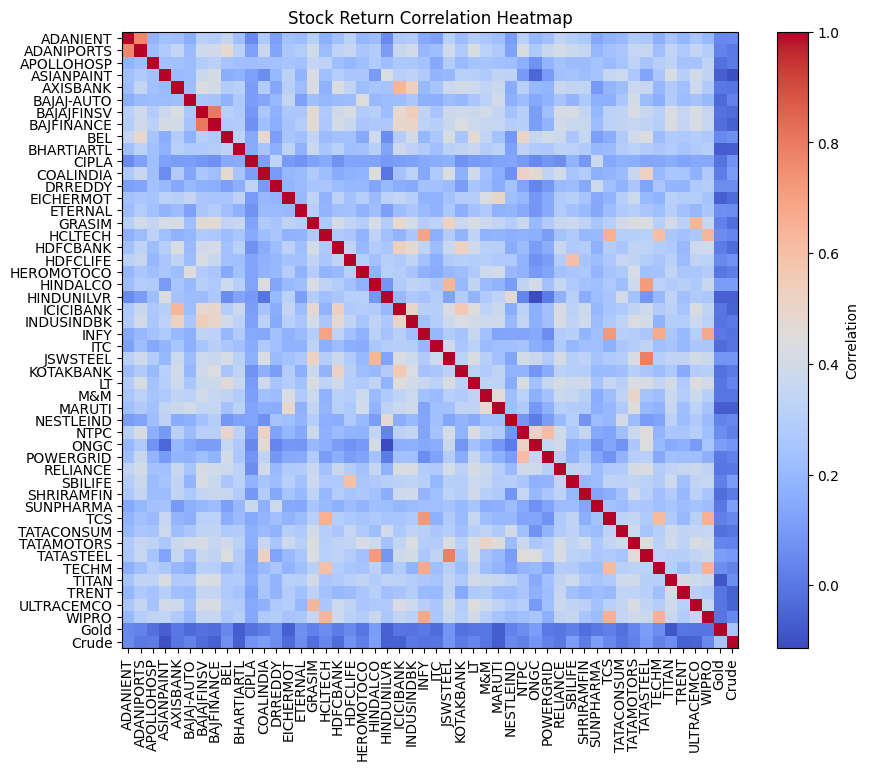

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title("Stock Return Correlation Heatmap")
plt.show()

In [ ]:
stocks_df

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BEL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-03,1715.0,736.1,4988.0,3425.55,697.95,3279.00,1696.00,722.50,70.40,691.75,...,850.00,3815.00,739.80,496.70,111.50,1755.15,2529.75,1053.05,7712.00,359.50
2022-01-04,1718.0,739.0,4962.0,3454.25,709.50,3294.95,1710.00,736.00,72.00,697.25,...,838.90,3878.70,729.95,489.50,111.30,1755.00,2582.00,1057.00,7653.00,361.00
2022-01-05,1714.0,754.0,4967.0,3526.00,726.00,3350.00,1798.35,766.50,71.00,700.00,...,837.15,3856.00,724.50,487.85,114.00,1711.00,2574.00,1069.00,7649.05,356.80
2022-01-06,1711.0,739.0,4958.0,3511.00,729.00,3415.10,1795.50,773.50,70.65,710.75,...,829.85,3809.95,717.50,488.45,112.50,1666.00,2595.95,1080.00,7455.00,353.40
2022-01-07,1694.9,736.0,5013.0,3573.90,730.85,3395.00,1772.35,765.50,69.40,705.50,...,829.60,3858.90,729.10,490.00,112.20,1676.95,2571.00,1083.00,7546.15,354.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-04,2364.7,1395.0,7309.0,2450.00,1068.70,8176.00,1932.00,885.80,389.90,1915.10,...,1638.40,3078.70,1075.00,653.90,159.25,1475.00,3350.60,5248.50,12250.00,245.80
2025-08-05,2333.0,1361.9,7260.0,2434.90,1071.10,8221.00,1942.00,892.30,386.60,1930.30,...,1631.90,3060.00,1065.50,655.00,159.45,1483.00,3424.00,5320.00,12327.00,245.45
2025-08-06,2300.0,1366.9,7180.5,2484.10,1068.90,8175.00,1926.00,876.95,389.30,1924.00,...,1593.50,3031.60,1052.60,653.20,158.70,1455.00,3400.00,5335.00,12215.00,239.75


In [ ]:
df_std = stocks_df.pct_change().dropna().std()*100

In [ ]:
df_std

,0
ADANIENT,3.351080
ADANIPORTS,2.453625
APOLLOHOSP,1.556391
ASIANPAINT,1.352186
AXISBANK,1.525657
BAJAJ-AUTO,1.560148
BAJAJFINSV,1.674062
BAJFINANCE,1.722943
BEL,2.058741
BHARTIARTL,1.337131


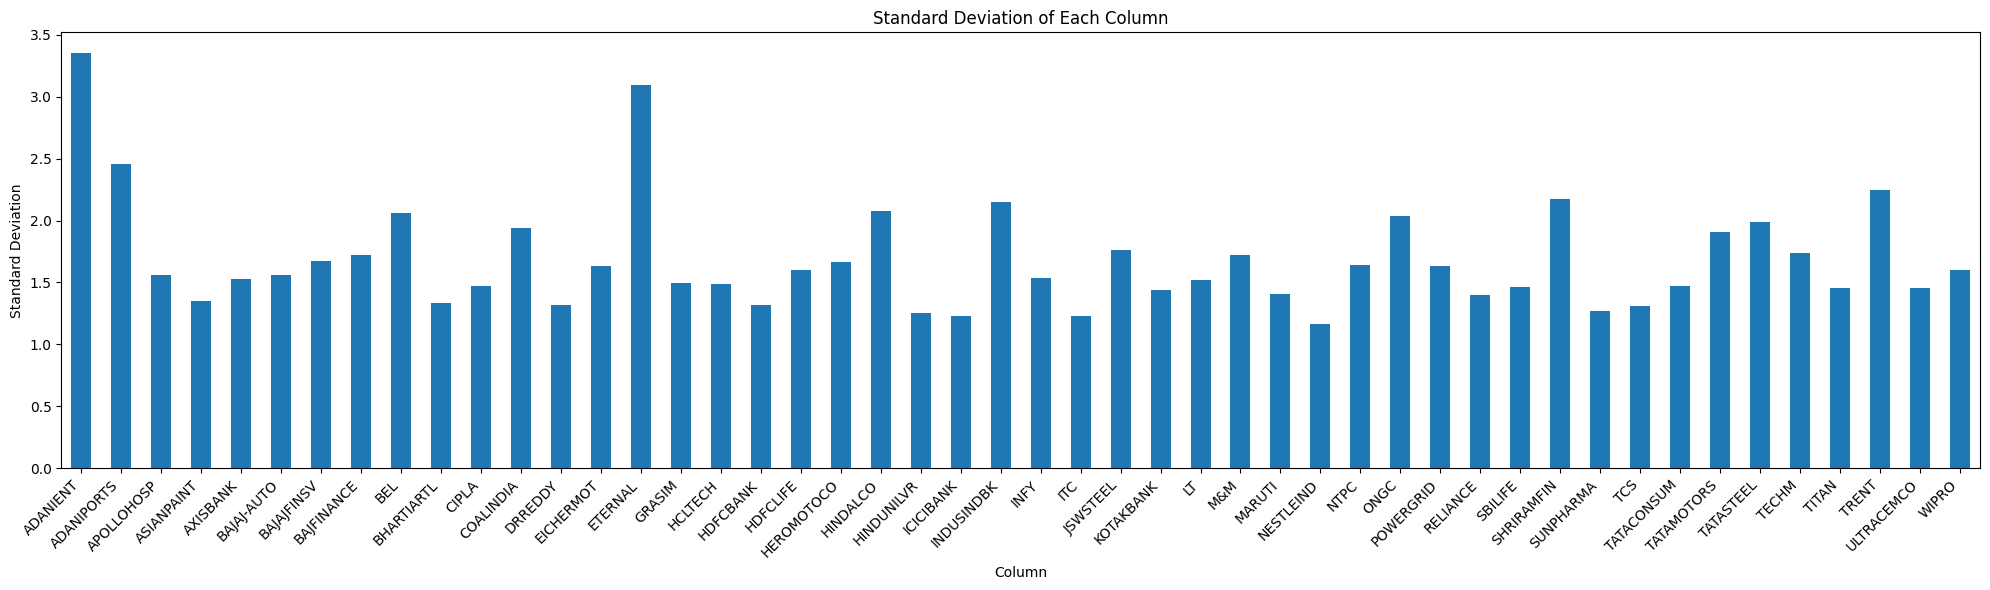

In [ ]:
plt.figure(figsize=(20, 6))
df_std.plot(kind='bar')
plt.title('Standard Deviation of Each Column')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
df_returns = stocks_df.pct_change().dropna()*100

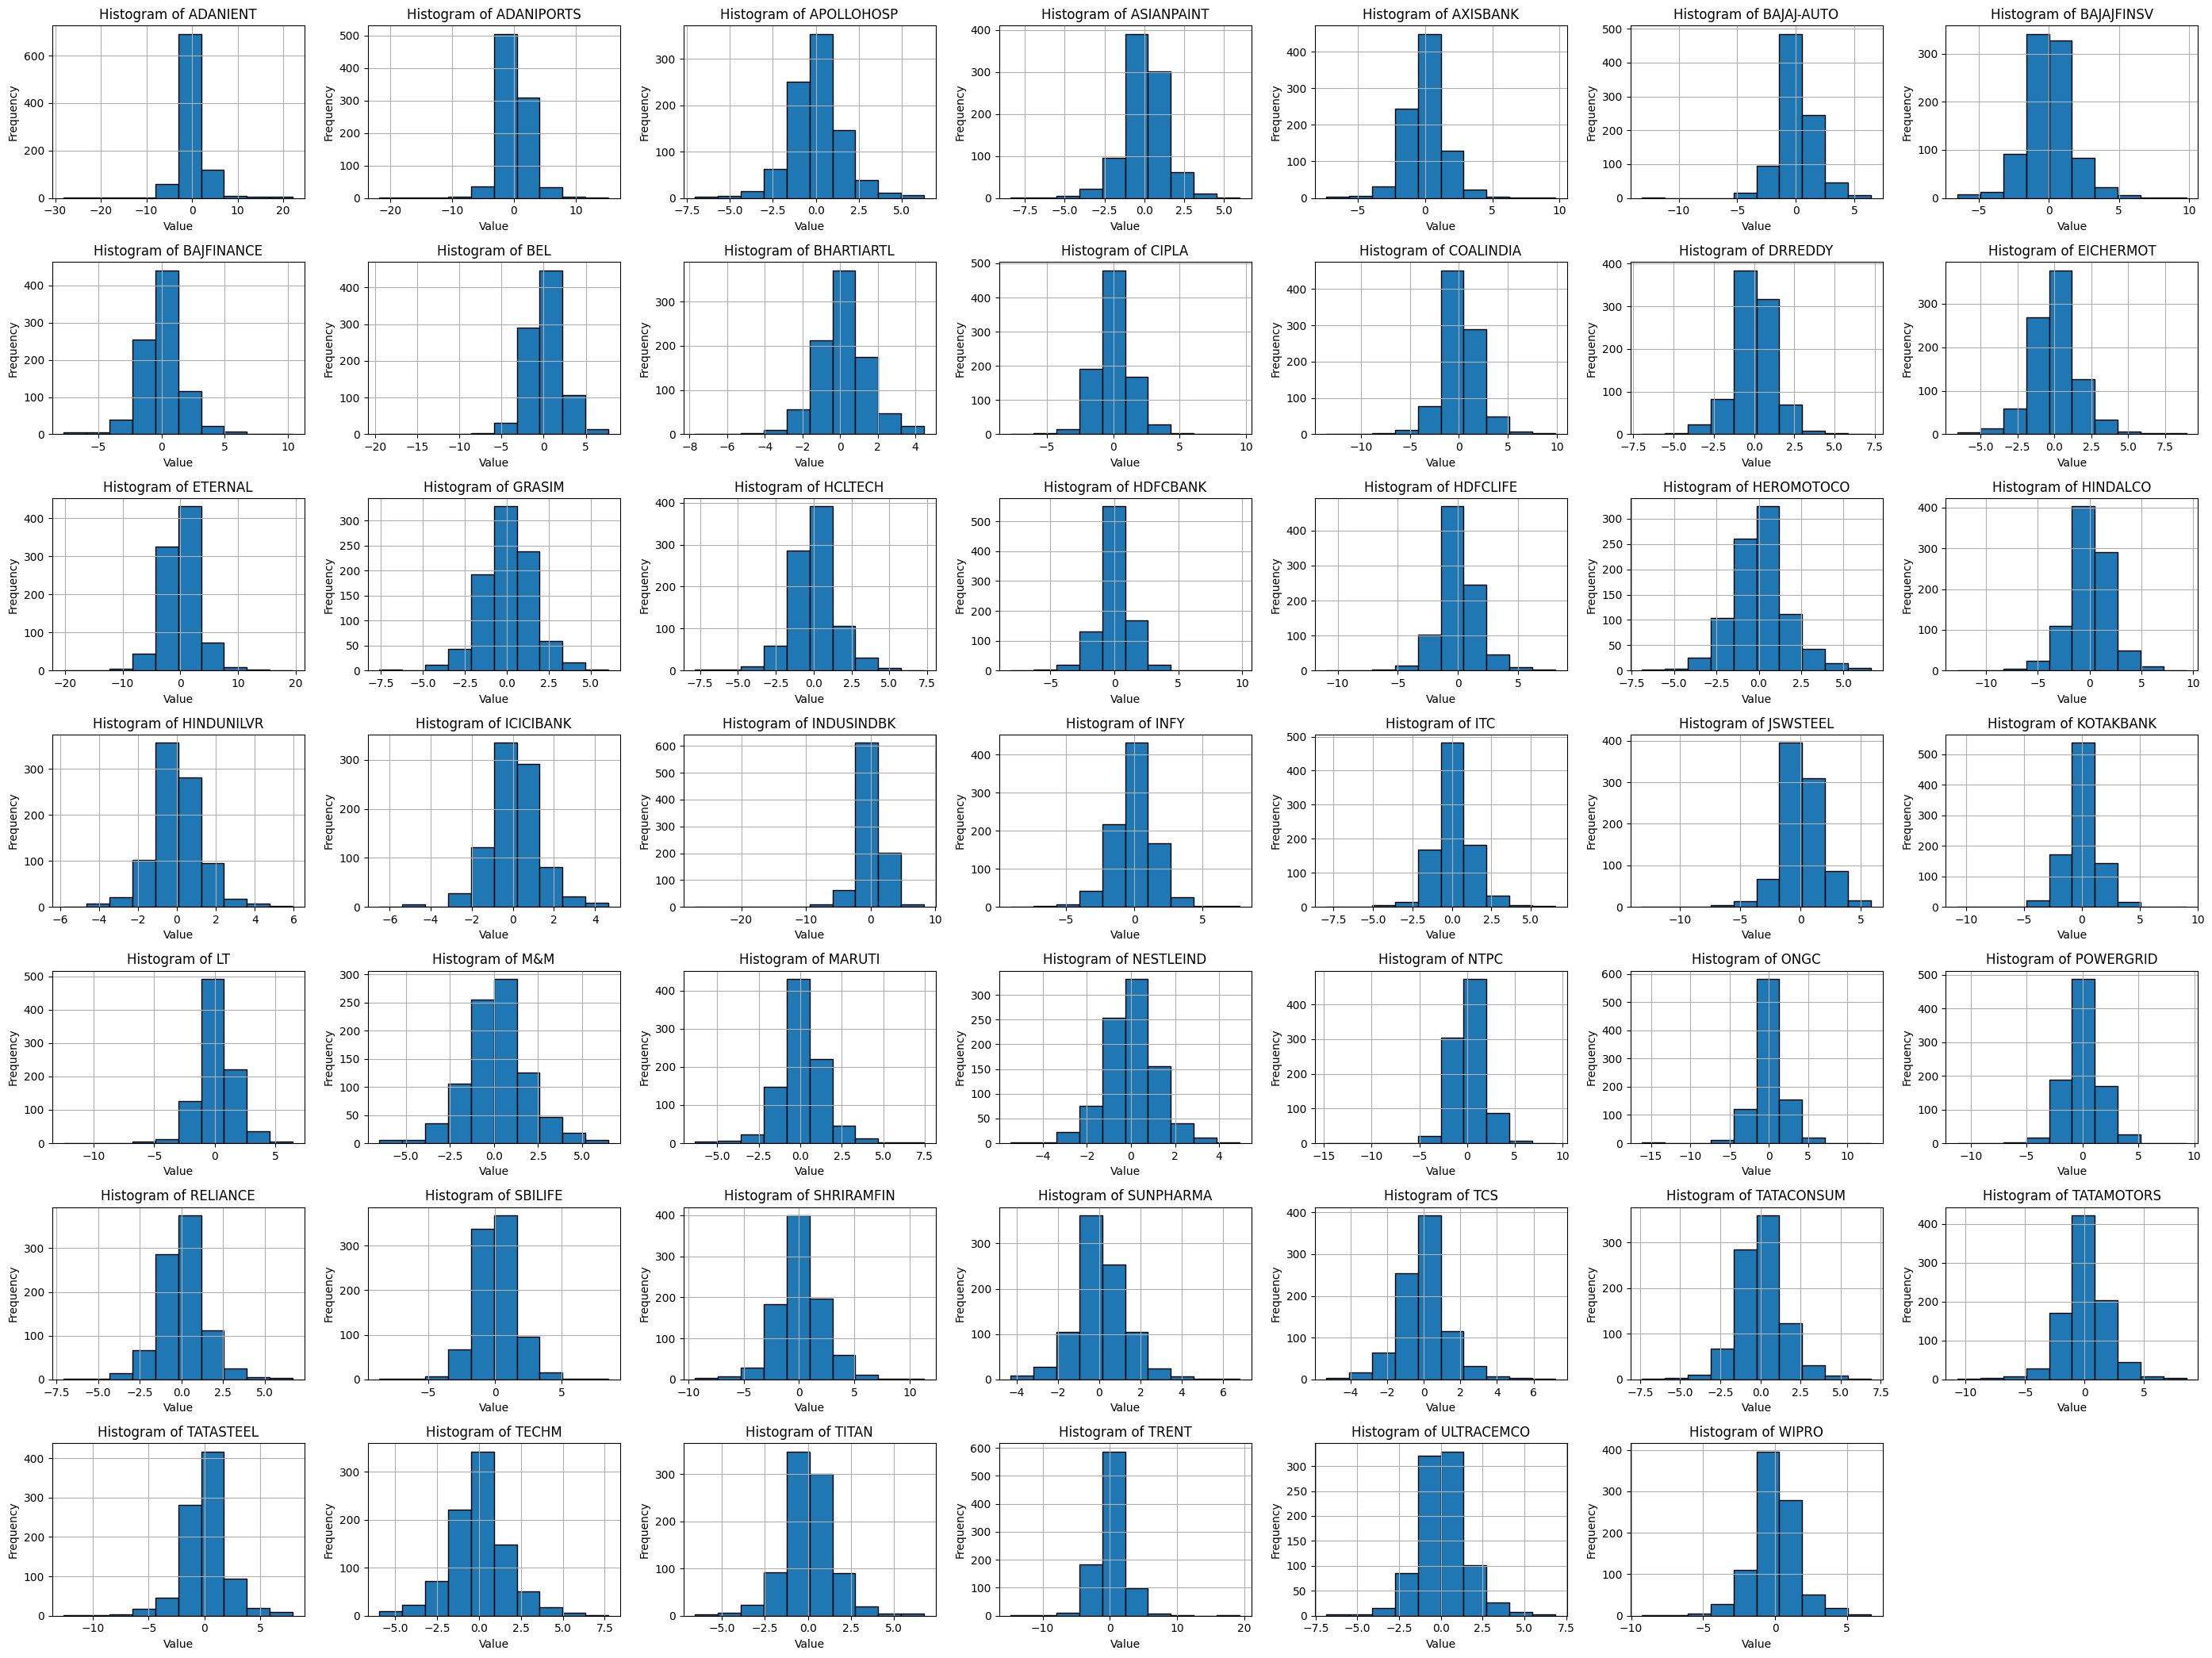

In [ ]:
import numpy as np
num_columns = len(df_returns.columns)
num_rows = int(np.ceil(np.sqrt(num_columns)))
num_cols = int(np.ceil(num_columns / num_rows))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 4, num_rows * 3))

# Flatten the axes array for easier iteration if it's 2D
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df_returns.columns):
    df_returns[column].hist(ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots if the number of columns is not a perfect square
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()